# Contractions

In [29]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def resolve_contractions(text):
    doc = nlp(text)
    print(doc)
    resolved_text = ' '.join([token.lemma_ if token.lemma_ != '-PRON-' else token.text for token in doc])
    return resolved_text

# Example usage
input_text = "I ain't going to the party, I can't make it tonight."
resolved_text = resolve_contractions(input_text)
print(resolved_text)


I ain't going to the party, I can't make it tonight.
I be not go to the party , I can not make it tonight .


In [28]:
# !pip install contractions

# import library
import contractions

text = "I'll've be there within 5 min. Shouldn't you be there too? I'd love to see u there my dear."

expanded_words = [] 
for word in text.split():
    expanded_words.append(contractions.fix(word)) 

expanded_text = ' '.join(expanded_words)
print('Original text: ' + text)
print('Expanded_text: ' + expanded_text)


Original text: I'll've be there within 5 min. Shouldn't you be there too? I'd love to see u there my dear.
Expanded_text: I will have be there within 5 min. Should not you be there too? I would love to see you there my dear.


In [22]:
# import library
import contractions

text = "I'll be there within 5 min. Shouldn't you be there too? I'd love to see u there my dear. It's awesome to meet new friends. We've been waiting for this day for so long."


# New Model - 
https://towardsdatascience.com/toxic-comment-classification-using-lstm-and-lstm-cnn-db945d6b7986

https://github.com/shaunak09vb/Toxic-Comment-Classifier-AWS/blob/main/

[nltk_data] Downloading package wordnet to /Users/hims/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total of 999995 word vectors are found.
Data Cleaned
Data Assigned to Variable X and y!
Data Tokenized-1
Data Tokenized-2
Found 149351 unique tokens
Saving tokens ...
Shape of Data Tensor: [[  413     3   480 ...     0     0     0]
 [  187 11889   797 ...     0     0     0]
 [  245   243    65 ...     0     0     0]
 ...
 [23240  5430  3793 ...     0     0     0]
 [  100    92   132 ...     0     0     0]
 [   77    36   173 ...     0     0     0]]
 Completed! Embedding Matrix
Embedding Layer Created!
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200)]             0         
                                                                 
 embeddings (Embedding)      (None, 200, 300)          44805600  
                                                                 
 lstm_layer (LSTM)           (None, 200, 40)           54560     
              

/Users/hims/anaconda3/envs/python310/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


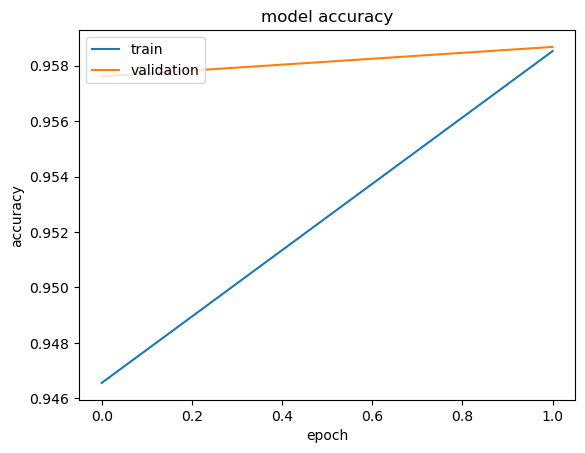

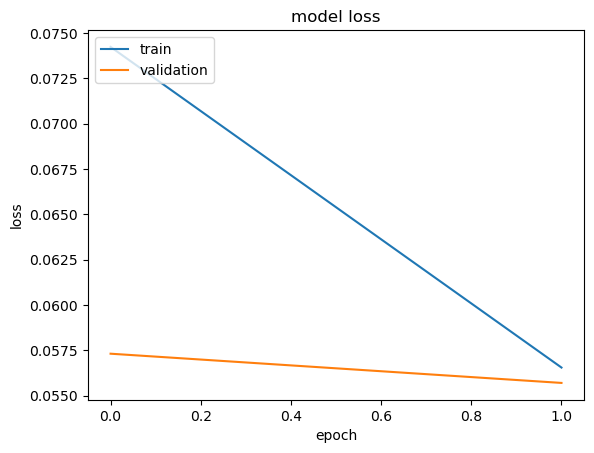

4987/4987 [==============================] - 105s 21ms/step
Average ROC_AUC Score: 0.982617561109391


In [153]:
EMBEDDING_DIMENSION = 300
EMBEDDING_FILE_LOCATION = 'model/wiki-news-300d-1M.vec'
TRAINING_DATA_LOCATION = 'jigsaw-toxic-comment-classification-challenge/train.csv'
TEST_DATA_LABEL = 'jigsaw-toxic-comment-classification-challenge/test_labels.csv'
TEST_DATA_COMMENTS = 'jigsaw-toxic-comment-classification-challenge/test.csv'
MAX_VOCAB_SIZE = 100000
MAX_SEQUENCE_LENGTH = 200
BATCH_SIZE = 32
EPOCHS = 2
VALIDATION_SPLIT = 0.2
DETECTION_CLASSES = [
    'toxic',
    'severe_toxic',
    'obscene',
    'threat',
    'insult',
    'identity_hate',
    'neutral']

MODEL_LOCATION = 'model/toxicity_classifier.h5'
TOKENIZER_LOCATION = 'model/tokenizer.pickle'
















import re
import spacy
import nltk
# -------------------------------------------------------------------------
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
from string import ascii_lowercase


# import library
import contractions

# text = "I'll've be there within 5 min. Shouldn't you be there too? I'd love to see u there my dear."

def remove_contraction_(text):
    try:
        specials = ["’", "‘", "´", "`"]
        for s in specials:
            text = text.replace(s, "'")
        expanded_words = [] 
        for word in text.split():
            try:
                expanded_words.append(contractions.fix(word)) 
            except Exception as e:
                expanded_words.append(word)

        return ' '.join(expanded_words)
    except Exception as e:
        print(f"Error occurred during remove_contraction: {e}")
        print(f"{text = }")
        raise e



def remove_contraction(text):
    contraction_mapping = {"ain't": "is not", "aren't": "are not", "can't": "cannot", "'cause": "because",
                           "could've": "could have", "couldn't": "could not",
                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                           "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will",
                           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
                           "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
                           "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am",
                           "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
                           "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
                           "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not",
                           "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
                           "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                           "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
                           "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
                           "she'll've": "she will have", "she's": "she is", "should've": "should have",
                           "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                           "so's": "so as",
                           "this's": "this is", "that'd": "that would", "that'd've": "that would have",
                           "that's": "that is",
                           "there'd": "there would", "there'd've": "there would have", "there's": "there is",
                           "here's": "here is",
                           "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
                           "they'll've": "they will have",
                           "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
                           "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
                           "we'll've": "we will have",
                           "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                           "what'll've": "what will have",
                           "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
                           "when've": "when have",
                           "where'd": "where did", "where's": "where is", "where've": "where have",
                           "who'll": "who will",
                           "who'll've": "who will have",
                           "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have",
                           "will've": "will have",
                           "won't": "will not", "won't've": "will not have", "would've": "would have",
                           "wouldn't": "would not",
                           "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                           "y'all'd've": "you all would have",
                           "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would",
                           "you'd've": "you would have", "you'll": "you will",
                           "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])
    return text

def clean_repeat_patterns_lower(text,remove_repeat_text=True, remove_patterns_text=True, is_lower=True):
    
    RE_PATTERNS = {
    ' american ':
        [
            'amerikan'
        ],

    ' adolf ':
        [
            'adolf'
        ],


    ' hitler ':
        [
            'hitler'
        ],

    ' fuck':
        [
            '(f)(u|[^a-z0-9 ])(c|[^a-z0-9 ])(k|[^a-z0-9 ])([^ ])*',
            '(f)([^a-z]*)(u)([^a-z]*)(c)([^a-z]*)(k)',
            ' f[!@#\$%\^\&\*]*u[!@#\$%\^&\*]*k', 'f u u c',
            '(f)(c|[^a-z ])(u|[^a-z ])(k)', r'f\*',
            'feck ', ' fux ', 'f\*\*', 'f**k','fu*k',
            'f\-ing', 'f\.u\.', 'f###', ' fu ', 'f@ck', 'f u c k', 'f uck', 'f ck'
        ],

    ' ass ':
        [
            '[^a-z]ass ', '[^a-z]azz ', 'arrse', ' arse ', '@\$\$',
            '[^a-z]anus', ' a\*s\*s', '[^a-z]ass[^a-z ]',
            'a[@#\$%\^&\*][@#\$%\^&\*]', '[^a-z]anal ', 'a s s','a55', '@$$'
        ],

    ' ass hole ':
        [
            ' a[s|z]*wipe', 'a[s|z]*[w]*h[o|0]+[l]*e', '@\$\$hole', 'a**hole'
        ],

    ' bitch ':
        [
            'b[w]*i[t]*ch', 'b!tch',
            'bi\+ch', 'b!\+ch', '(b)([^a-z]*)(i)([^a-z]*)(t)([^a-z]*)(c)([^a-z]*)(h)',
            'biatch', 'bi\*\*h', 'bytch', 'b i t c h', 'b!tch', 'bi+ch', 'l3itch'
        ],

    ' bastard ':
        [
            'ba[s|z]+t[e|a]+rd'
        ],

    ' trans gender':
        [
            'transgender'
        ],

    ' gay ':
        [
            'gay'
        ],

    ' cock ':
        [
            '[^a-z]cock', 'c0ck', '[^a-z]cok ', 'c0k', '[^a-z]cok[^aeiou]', ' cawk',
            '(c)([^a-z ])(o)([^a-z ]*)(c)([^a-z ]*)(k)', 'c o c k'
        ],

    ' dick ':
        [
            ' dick[^aeiou]', 'deek', 'd i c k', 'dik'
        ],

    ' suck ':
        [
            'sucker', '(s)([^a-z ]*)(u)([^a-z ]*)(c)([^a-z ]*)(k)', 'sucks', '5uck', 's u c k'
        ],

    ' cunt ':
        [
            'cunt', 'c u n t'
        ],

    ' bull shit ':
        [
            'bullsh\*t', 'bull\$hit'
        ],

    ' homo sex ual':
        [
            'homosexual'
        ],

    ' jerk ':
        [
            'jerk'
        ],

    ' idiot ':
        [
            'i[d]+io[t]+', '(i)([^a-z ]*)(d)([^a-z ]*)(i)([^a-z ]*)(o)([^a-z ]*)(t)', 'idiots'
                                                                                      'i d i o t'
        ],

    ' dumb ':
        [
            '(d)([^a-z ]*)(u)([^a-z ]*)(m)([^a-z ]*)(b)'
        ],

    ' shit ':
        [
            'shitty', '(s)([^a-z ]*)(h)([^a-z ]*)(i)([^a-z ]*)(t)', 'shite', '\$hit', 's h i t', '$h1t'
        ],

    ' shit hole ':
        [
            'shythole'
        ],

    ' retard ':
        [
            'returd', 'retad', 'retard', 'wiktard', 'wikitud'
        ],

    ' rape ':
        [
            ' raped'
        ],

    ' dumb ass':
        [
            'dumbass', 'dubass'
        ],

    ' ass head':
        [
            'butthead'
        ],

    ' sex ':
        [
            'sexy', 's3x', 'sexuality'
        ],


    ' nigger ':
        [
            'nigger', 'ni[g]+a', ' nigr ', 'negrito', 'niguh', 'n3gr', 'n i g g e r'
        ],

    ' shut the fuck up':
        [
            'stfu', 'st*u'
        ],

    ' pussy ':
        [
            'pussy[^c]', 'pusy', 'pussi[^l]', 'pusses', 'p*ssy'
        ],

    ' faggot ':
        [
            'faggot', ' fa[g]+[s]*[^a-z ]', 'fagot', 'f a g g o t', 'faggit',
            '(f)([^a-z ]*)(a)([^a-z ]*)([g]+)([^a-z ]*)(o)([^a-z ]*)(t)', 'fau[g]+ot', 'fae[g]+ot',
        ],

    ' mother fucker':
        [
            ' motha ', ' motha f', ' mother f', 'motherucker',
        ],

    ' whore ':
        [
            'wh\*\*\*', 'w h o r e'
        ],
    ' fucking ':
        [
            'f*$%-ing'
        ],
}
    
    if is_lower:
      text=text.lower()
      
    if remove_patterns_text:
      for target, patterns in RE_PATTERNS.items():
        for pat in patterns:
          text=str(text).replace(pat, target)
    
    if remove_repeat_text:
      text = re.sub(r'(.)\1{2,}', r'\1', text) 
    
    text = str(text).replace("\n", " ")
    text = re.sub(r'[^\w\s]',' ',text)
    text = re.sub('[0-9]',"",text)
    text = re.sub(" +", " ", text)
    text = re.sub("([^\x00-\x7F])+"," ",text)
    return text 

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"
        u"\U0001F1F2-\U0001F1F4"  
        u"\U0001F1E6-\U0001F1FF"
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def prepare_stopwords_list():
    stopword_list=STOP_WORDS
    potential_stopwords=['editor', 'reference', 'thank', 'work','find', 'good', 'know', 'like', 'look', 'thing', 'want', 'time', 'list', 'section','wikipedia', 'doe', 'add','new', 'try', 'think', 'write','use', 'user', 'way', 'page']
    for word in potential_stopwords:
        stopword_list.add(word)
    return(stopword_list)

def remove_stop_words(text, remove_stop=True):
    stop_words=prepare_stopwords_list()
    output = ""
    if remove_stop:
      text=text.split(" ")
      for word in text:
        if word not in stop_words:
          output=output + " " + word
    else :
      output=text  
    return str(output.strip()) 
    
def lemmatize(text, lemmatization=True):
  wordnet_lemmatizer = WordNetLemmatizer()
  output=""
  if lemmatization:
    text=text.split(" ")
    for word in text:
       word1 = wordnet_lemmatizer.lemmatize(word, pos = "n")
       word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
       word3 = wordnet_lemmatizer.lemmatize(word2, pos = "a")
       word4 = wordnet_lemmatizer.lemmatize(word3, pos = "r")
       output=output + " " + word4
  else:
    output=text
  return str(output.strip())    

def clean_text_column(text_column):
    return text_column.apply(lambda x: clean_text(x))

def clean_text(text):
    text=remove_contraction(text)
    text=clean_repeat_patterns_lower(text)
    text=remove_emojis(text)
    text=remove_stop_words(text)
    text=lemmatize(text)
    return text










import numpy as np
import pandas as pd
import pickle
import tensorflow
from tensorflow import keras
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# from config import *
# from data_cleaning import clean_text_column

# -------------------------------------------------------------------------

def sum_of_columns(dataframe, columns):
    temp = 0
    for col in columns:
        temp += dataframe[col]
    return temp

class DataPreprocess:

    def __init__(self, data, do_load_existing_tokenizer=False):
        
        self.data = data
        self.doLoadExistingTokenizer = do_load_existing_tokenizer
        # -------------------------------------------------------------------------
        embeddings_index_fasttext = {}
        with open(EMBEDDING_FILE_LOCATION,encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                embeddings_index_fasttext[word] = np.asarray(values[1:], dtype='float32')
                
        print(f'Total of {len(embeddings_index_fasttext)} word vectors are found.')
        # -------------------------------------------------------------------------
        cols = DETECTION_CLASSES.copy()
        cols.remove('neutral')
        data['neutral'] = np.where(sum_of_columns(data, cols) > 0, 0, 1)
        # -------------------------------------------------------------------------
        data['comment_text'] = clean_text_column(data['comment_text'])
        print("Data Cleaned")
        # -------------------------------------------------------------------------
        processed_train_data = data['comment_text'].values
        self.target_classes = data[DETECTION_CLASSES].values
        print("Data Assigned to Variable X and y!")
        # -------------------------------------------------------------------------
        if not do_load_existing_tokenizer:
            tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
            tokenizer.fit_on_texts(processed_train_data)
        else:
            with open(TOKENIZER_LOCATION, 'rb') as handle:
                tokenizer = pickle.load(handle)
        print('Data Tokenized-1')
        # -------------------------------------------------------------------------
        list_tokenized_train = tokenizer.texts_to_sequences(processed_train_data)
        print('Data Tokenized-2')
        # -------------------------------------------------------------------------
        word_index = tokenizer.word_index
        print(f'Found {len(word_index)} unique tokens')
        # -------------------------------------------------------------------------
        if not do_load_existing_tokenizer:
            print('Saving tokens ...')
            with open(TOKENIZER_LOCATION, 'wb') as handle:
                pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
        # -------------------------------------------------------------------------
        self.X_t=pad_sequences(list_tokenized_train, maxlen=MAX_SEQUENCE_LENGTH, padding = 'post')
        print('Shape of Data Tensor:', self.X_t)
        # -------------------------------------------------------------------------
        embedding_matrix_fasttext = np.random.random((len(word_index) + 1, EMBEDDING_DIMENSION))
        for word, i in word_index.items():
            embedding_vector = embeddings_index_fasttext.get(word)
            if embedding_vector is not None:
                embedding_matrix_fasttext[i] = embedding_vector
        print(" Completed! Embedding Matrix")
        # -------------------------------------------------------------------------
        self.embedding_layer = Embedding(len(word_index) + 1,
                                         EMBEDDING_DIMENSION,
                                         weights = [embedding_matrix_fasttext],
                                         input_length = MAX_SEQUENCE_LENGTH,
                                         trainable=False,
                                         name = 'embeddings')
        print("Embedding Layer Created!")
        # -------------------------------------------------------------------------
        
        
        
        
        
        
        
        
        
        


# import click
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.layers import Dense, Input, LSTM, Dropout
from keras.layers import GlobalMaxPool1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_auc_score

# from config import *
# from data_preprocessing import DataPreprocess
# -------------------------------------------------------------------------

def build_lstm_model(data, target_classes, embedding_layer):
    
    inp=Input(shape=(MAX_SEQUENCE_LENGTH, ),dtype='int32')
    embedded_sequences = embedding_layer(inp)
    x = LSTM(40, return_sequences=True,name='lstm_layer')(embedded_sequences)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(30, activation="relu", kernel_initializer='he_uniform')(x)
    x = Dropout(0.1)(x)
    preds = Dense(7, activation="sigmoid", kernel_initializer='glorot_uniform')(x)
    # -------------------------------------------------------------------------
    model_1 = Model(inputs=inp, outputs=preds)
    model_1.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    # -------------------------------------------------------------------------
    model_1.summary()
    # -------------------------------------------------------------------------
    checkpoint = ModelCheckpoint(filepath=MODEL_LOCATION,  # saves the 'best' model
                                  monitor='val_loss',
                                  save_best_only=True,
                                  mode='min',
                                  save_weights_only=True)
    # -------------------------------------------------------------------------
    history = model_1.fit(data,
                        target_classes,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_split=VALIDATION_SPLIT,
                        verbose=1)
    # -------------------------------------------------------------------------
    model_1.save(MODEL_LOCATION)
    # -------------------------------------------------------------------------
    return model_1, history





# -------------------------------------------------------------------------
def plot_training_history(lstm_model, history, data, target_classes):
    # "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig('../accuracy.jpeg')
    plt.show()

    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig('../loss.jpeg')
    plt.show()

    # Print Average ROC_AUC_Score
    p = lstm_model.predict(data)
    aucs = []
    for j in range(len(DETECTION_CLASSES)):
        auc = roc_auc_score(target_classes[:, j], p[:, j])
        aucs.append(auc)
    print(f'Average ROC_AUC Score: {np.mean(aucs)}')


# @click.command()
# @click.option('--data', default=TRAINING_DATA_LOCATION, help="Training Data Location")
def execute(data):
    training_data = pd.read_csv(data)

    preprocessing = DataPreprocess(training_data)
    lstm_model, history = build_lstm_model(preprocessing.X_t,
                                         preprocessing.target_classes,
                                         preprocessing.embedding_layer)
    plot_training_history(lstm_model, 
                          history,
                          preprocessing.X_t,
                          preprocessing.target_classes)
# -------------------------------------------------------------------------
# if __name__ == '__main__':
execute(f'jigsaw-toxic-comment-classification-challenge/train.csv')

In [154]:
from tensorflow.keras.models import load_model


lstm_model = load_model(MODEL_LOCATION)


training_data = pd.read_csv(f'jigsaw-toxic-comment-classification-challenge/train.csv')

preprocessing = DataPreprocess(training_data)
data = preprocessing.X_t
target_classes = preprocessing.target_classes


# Print Average ROC_AUC_Score
p = lstm_model.predict(data)
aucs = []
for j in range(len(DETECTION_CLASSES)):
    auc = roc_auc_score(target_classes[:, j], p[:, j])
    aucs.append(auc)
print(f'Average ROC_AUC Score: {np.mean(aucs)}')

Total of 999995 word vectors are found.
Data Cleaned
Data Assigned to Variable X and y!
Data Tokenized-1
Data Tokenized-2
Found 149351 unique tokens
Saving tokens ...
Shape of Data Tensor: [[  413     3   480 ...     0     0     0]
 [  187 11889   797 ...     0     0     0]
 [  245   243    65 ...     0     0     0]
 ...
 [23240  5430  3793 ...     0     0     0]
 [  100    92   132 ...     0     0     0]
 [   77    36   173 ...     0     0     0]]
 Completed! Embedding Matrix
Embedding Layer Created!
4987/4987 [==============================] - 108s 22ms/step
Average ROC_AUC Score: 0.982617561109391


In [155]:
df1 = pd.read_csv(f'jigsaw-toxic-comment-classification-challenge/test.csv')
df2 = pd.read_csv(f'jigsaw-toxic-comment-classification-challenge/test_labels.csv')

df_test = pd.merge(df1, df2, on='id', how='inner')
df_test.head()
# removing sample with labels equal to -1
df_test = df_test.loc[df_test['toxic'] >= 0]
df_test.reset_index(inplace=True)
df_test = df_test.drop(columns=['index'])
df_test.head()
df_test.shape
preprocessing_test = DataPreprocess(df_test, do_load_existing_tokenizer=True)
data_test = preprocessing_test.X_t
target_classes_test = preprocessing_test.target_classes


# Print Average ROC_AUC_Score
p_test = lstm_model.predict(data_test)
aucs_test = []
for j in range(len(DETECTION_CLASSES)):
    auc = roc_auc_score(target_classes_test[:, j], p_test[:, j])
    aucs_test.append(auc)
print(f'Average ROC_AUC Score: {np.mean(aucs_test)}')

Total of 999995 word vectors are found.
Data Cleaned
Data Assigned to Variable X and y!
Data Tokenized-1
Data Tokenized-2
Found 149351 unique tokens
Shape of Data Tensor: [[   77   817    31 ...     0     0     0]
 [  766   321    97 ...     0     0     0]
 [  935 11478   645 ...     0     0     0]
 ...
 [ 1702   263   237 ...     0     0     0]
 [ 4520  4725   637 ...     0     0     0]
 [12323 21143  2576 ...     0     0     0]]
 Completed! Embedding Matrix
Embedding Layer Created!
2000/2000 [==============================] - 42s 21ms/step
Average ROC_AUC Score: 0.9734631692674768


# Above Aproach using the Pytorch

In [156]:
EMBEDDING_DIMENSION = 300
EMBEDDING_FILE_LOCATION = 'model_pytorch/wiki-news-300d-1M.vec'
TRAINING_DATA_LOCATION = 'jigsaw-toxic-comment-classification-challenge/train.csv'
TEST_DATA_LABEL = 'jigsaw-toxic-comment-classification-challenge/test_labels.csv'
TEST_DATA_COMMENTS = 'jigsaw-toxic-comment-classification-challenge/test.csv'
MAX_VOCAB_SIZE = 100000
MAX_SEQUENCE_LENGTH = 200
BATCH_SIZE = 32
EPOCHS = 2
VALIDATION_SPLIT = 0.2
DETECTION_CLASSES = [
    'toxic',
    'severe_toxic',
    'obscene',
    'threat',
    'insult',
    'identity_hate',
    'neutral']

MODEL_LOCATION = 'model_pytorch/toxicity_classifier.h5'
TOKENIZER_LOCATION = 'model_pytorch/tokenizer.pickle'

In [181]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Define constants
MAX_SEQUENCE_LENGTH = 100  # Example value, adjust as needed
EMBEDDING_DIMENSION = 300  # Example value, adjust as needed
BATCH_SIZE = 32  # Example value, adjust as needed
EPOCHS = 2  # Example value, adjust as needed
VALIDATION_SPLIT = 0.2  # Example value, adjust as needed

# Load data
training_data = pd.read_csv('jigsaw-toxic-comment-classification-challenge/train.csv')

# Define a function to calculate the sum of columns
def sum_of_columns(dataframe, columns):
    return dataframe[columns].sum(axis=1)

# Calculate 'neutral' column using sum_of_columns function
training_data['neutral'] = np.where(sum_of_columns(training_data, ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']) > 0, 0, 1)

# Data preprocessing
def clean_text_column(text_column):
    # Implement your text cleaning/preprocessing logic here
    return text_column

training_data['comment_text'] = clean_text_column(training_data['comment_text'])

# Tokenization
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(training_data['comment_text'])

list_tokenized_train = tokenizer.texts_to_sequences(training_data['comment_text'])

word_index = tokenizer.word_index

# Pad sequences
X_t = pad_sequences(list_tokenized_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Load pre-trained embeddings
embeddings_index_fasttext = {}
with open(EMBEDDING_FILE_LOCATION, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embeddings_index_fasttext[word] = np.asarray(values[1:], dtype='float32')

# Create embedding matrix
embedding_matrix_fasttext = np.random.random((len(word_index) + 1, EMBEDDING_DIMENSION))
for word, i in word_index.items():
    embedding_vector = embeddings_index_fasttext.get(word)
    if embedding_vector is not None:
        embedding_matrix_fasttext[i] = embedding_vector


# Initialize embedding layer
embedding_layer = nn.Embedding(len(word_index) + 1, EMBEDDING_DIMENSION)
embedding_layer.weight = nn.Parameter(torch.Tensor(embedding_matrix_fasttext))

# Convert data to PyTorch tensors
data_tensor = torch.tensor(X_t, dtype=torch.long)
target_tensor = torch.tensor(training_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values, dtype=torch.float)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data_tensor, target_tensor, test_size=VALIDATION_SPLIT)

# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)


In [183]:
word_index['t']

494

In [158]:
# Define LSTM model class
class LSTMModel(nn.Module):
    def __init__(self, embedding_layer, num_classes, hidden_size=40, dropout=0.1):
        super(LSTMModel, self).__init__()
        self.embedding_layer = embedding_layer
        self.lstm = nn.LSTM(embedding_layer.embedding_dim, hidden_size, batch_first=True)
        self.global_max_pooling = nn.AdaptiveMaxPool1d(1)
        self.dropout1 = nn.Dropout(dropout)
        self.dense1 = nn.Linear(hidden_size, 30)
        self.relu = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)
        self.dense2 = nn.Linear(30, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded_sequences = self.embedding_layer(x)
        lstm_output, _ = self.lstm(embedded_sequences)
        global_max_pooled = self.global_max_pooling(lstm_output.permute(0, 2, 1))
        x = self.dropout1(global_max_pooled.squeeze(2))
        x = self.relu(self.dense1(x))
        x = self.dropout2(x)
        x = self.dense2(x)
        return self.sigmoid(x)


# Initialize model, loss function, and optimizer
model = LSTMModel(embedding_layer, num_classes=6)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())
from tqdm import tqdm  # Import tqdm for progress tracking
print("Started training")
# Training loop
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    
    for inputs, labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()

    # Print training/validation statistics
    print(f'Epoch {epoch + 1}/{EPOCHS}, Loss: {running_loss / len(train_loader):.4f}, Val Loss: {val_loss / len(val_loader):.4f}')


Started training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [07:15<00:00,  9.16it/s]


Epoch 1/2, Loss: 0.0633, Val Loss: 0.0490


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [07:11<00:00,  9.24it/s]


Epoch 2/2, Loss: 0.0443, Val Loss: 0.0477


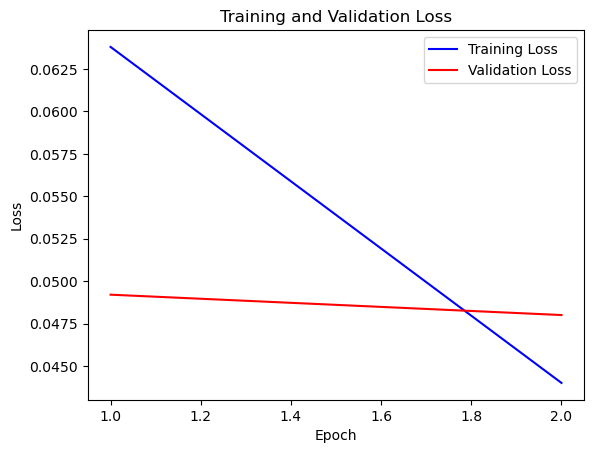

In [159]:
import matplotlib.pyplot as plt

# Given loss values
train_losses = [0.0638, 0.0440]
val_losses = [0.0492, 0.0480]

# Number of epochs
epochs = range(1, len(train_losses) + 1)

# Plotting the training and validation loss
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [163]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score



def evaluate(model, loader):
    predicted = []
    actual = []
    flag = True
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            predicted.extend(outputs)
            actual.extend(labels)
            
            if flag:
                flag = False
                print(inputs, '\n', outputs)
                
    print(predicted[0], '\n', actual[0])

    threshold = 0.5
    predicted_classes = [[1 if val >= threshold else 0 for val in output] for output in predicted]

    precision = []
    recall = []
    f1 = []
    accuracy = []
    roc_auc = []
    for i in range(len(actual[0])):
        precision.append(precision_score([row[i] for row in actual], [row[i] for row in predicted_classes]))
        recall.append(recall_score([row[i] for row in actual], [row[i] for row in predicted_classes]))
        f1.append(f1_score([row[i] for row in actual], [row[i] for row in predicted_classes]))
        accuracy.append(accuracy_score([row[i] for row in actual], [row[i] for row in predicted_classes]))
        roc_auc.append(roc_auc_score([row[i] for row in actual], [row[i] for row in predicted]))

    # roc_auc, np.mean(roc_auc)
    # Print or use the computed metrics as needed
    # for i in range(len(precision)):
    #     print(f'Class {i+1}:')
    #     print(f'Precision: {precision[i]}')
    #     print(f'Recall: {recall[i]}')
    #     print(f'F1-score: {f1[i]}')
    #     print(f'Accuracy: {accuracy[i]}')
    #     print(f'ROC AUC: {roc_auc[i]}')
    #     print()


    # Create a DataFrame to display the metrics
    metrics_df = pd.DataFrame({
        'Class': [DETECTION_CLASSES[i] for i in list(range(len(actual[0])))] + ['average'],
        'Precision': precision + [np.mean(precision)],
        'Recall': recall + [np.mean(recall)],
        'F1-score': f1 + [np.mean(f1)],
        'Accuracy': accuracy + [np.mean(accuracy)],
        'ROC AUC': roc_auc + [np.mean(roc_auc)]
    })

    # Display the DataFrame
    print(metrics_df.head(10))
    
    
evaluate(model, val_loader)

In [140]:
# evaluate(model, train_loader)

tensor([1.3790e-03, 7.0663e-07, 2.3172e-04, 5.9235e-06, 1.0370e-04, 1.4250e-05]) tensor([0., 0., 0., 0., 0., 0.])


/Users/hims/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hims/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Precision    Recall  F1-score  Accuracy   ROC AUC
0   0.907316  0.831173  0.867577  0.975771  0.993250
1   0.673130  0.192095  0.298893  0.991070  0.992421
2   0.858822  0.859973  0.859397  0.985202  0.995412
3   0.000000  0.000000  0.000000  0.997078  0.976853
4   0.819981  0.700878  0.755766  0.977768  0.991294
5   0.000000  0.000000  0.000000  0.991242  0.984921


In [161]:
# Load data
df1 = pd.read_csv(f'jigsaw-toxic-comment-classification-challenge/test.csv')
df2 = pd.read_csv(f'jigsaw-toxic-comment-classification-challenge/test_labels.csv')

df_test = pd.merge(df1, df2, on='id', how='inner')

# removing sample with labels equal to -1
df_test = df_test.loc[df_test['toxic'] >= 0]
df_test.reset_index(inplace=True)
df_test = df_test.drop(columns=['index'])
# print(df_test.head())
print("test shape = ", df_test.shape)



# Calculate 'neutral' column using sum_of_columns function
df_test['neutral'] = np.where(sum_of_columns(df_test, ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']) > 0, 0, 1)

df_test['comment_text'] = clean_text_column(df_test['comment_text'])

# # Tokenization
# tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
# tokenizer.fit_on_texts(training_data['comment_text'])

list_tokenized_test = tokenizer.texts_to_sequences(df_test['comment_text'])

word_index = tokenizer.word_index

# Pad sequences
X_test = pad_sequences(list_tokenized_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# # Load pre-trained embeddings
# embeddings_index_fasttext = {}
# with open(EMBEDDING_FILE_LOCATION, encoding='utf-8') as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         embeddings_index_fasttext[word] = np.asarray(values[1:], dtype='float32')

# # Create embedding matrix
# embedding_matrix_fasttext = np.random.random((len(word_index) + 1, EMBEDDING_DIMENSION))
# for word, i in word_index.items():
#     embedding_vector = embeddings_index_fasttext.get(word)
#     if embedding_vector is not None:
#         embedding_matrix_fasttext[i] = embedding_vector

        
# Convert data to PyTorch tensors
test_data_tensor = torch.tensor(X_test, dtype=torch.long)
test_target_tensor = torch.tensor(df_test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values, dtype=torch.float)

# Split data into training and validation sets
# X_test, X_vals, y_test, y_vals = train_test_split(data_tensor, target_tensor, test_size=0.0)

# Create DataLoader for training and validation sets
test_dataset = TensorDataset(test_data_tensor, test_target_tensor)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

test shape =  (63978, 8)


In [164]:
evaluate(model, test_loader)

tensor([[   94,     7,    18,  ...,     0,     0,     0],
        [   12,   254,   106,  ...,   113,    23,    94],
        [   41,    19,  1650,  ...,    14,  4387,     2],
        ...,
        [   83,   172,    20,  ...,     0,     0,     0],
        [   22,    11,  1887,  ...,     0,     0,     0],
        [   21, 12116,     1,  ...,     0,     0,     0]]) 
 tensor([[3.9987e-04, 1.6527e-07, 6.9071e-05, 5.1876e-07, 2.6825e-05, 4.1012e-06],
        [1.3286e-03, 1.5065e-06, 2.6660e-04, 3.7554e-06, 1.4015e-04, 2.6598e-05],
        [8.5460e-04, 9.6285e-07, 2.1941e-04, 1.9454e-06, 9.1630e-05, 1.5678e-05],
        [1.6821e-03, 3.1481e-06, 4.0122e-04, 6.4836e-06, 2.1437e-04, 4.5023e-05],
        [3.9109e-03, 6.0451e-06, 7.2582e-04, 1.7115e-05, 5.1051e-04, 1.0467e-04],
        [7.4713e-01, 1.3519e-02, 1.1480e-01, 3.3697e-02, 3.4720e-01, 8.8141e-02],
        [9.8447e-01, 2.4272e-01, 8.8747e-01, 5.1713e-02, 8.2403e-01, 1.6881e-01],
        [7.7108e-01, 1.8740e-02, 6.6480e-01, 1.2795e-02, 4.120

/Users/hims/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hims/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


           Class  Precision    Recall  F1-score  Accuracy   ROC AUC
0          toxic   0.555377  0.848933  0.671472  0.920926  0.965409
1   severe_toxic   0.000000  0.000000  0.000000  0.994248  0.986635
2        obscene   0.625081  0.787321  0.696882  0.960486  0.977974
3         threat   0.000000  0.000000  0.000000  0.996702  0.962886
4         insult   0.560772  0.686606  0.617342  0.954406  0.968322
5  identity_hate   0.000000  0.000000  0.000000  0.988871  0.958095
6        average   0.290205  0.387143  0.330949  0.969273  0.969887


In [171]:
list_tokenized_test = tokenizer.texts_to_sequences([clean_text("Bye! Don't look, come or think of comming back! Tosser.")])
seq = pad_sequences(list_tokenized_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print(seq)
predicted = model(torch.tensor(seq))
print(predicted)
predicted_classes = [[1 if val >= 0.5 else 0 for val in output] for output in predicted]
predicted_classes

[[ 2203  3803   494   274 16484 14840     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]]
tensor([[0.5289, 0.0042, 0.0366, 0.0169, 0.1543, 0.0396]],
       grad_fn=<SigmoidBackward0>)


[[1, 0, 0, 0, 0, 0]]

In [174]:
tokenizer.texts_to_sequences([clean_text("Bye! Don't look, come or think of comming back! Tosser."])

[[2203, 3803, 494, 274, 16484, 14840]]

In [175]:
clean_text("Bye! Don't look, come or think of comming back! Tosser.")

'bye don t come comming tosser'

In [177]:
tokenizer.texts_to_sequences(["bye don t come comming tosser"])

[[2203, 3803, 494, 274, 16484, 14840]]

# Working - 
https://www.youtube.com/watch?v=ZUqB-luawZg&ab_channel=NicholasRenotte 
https://github.com/nicknochnack/CommentToxicity/blob/main/Toxicity.ipynb

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization


df = train_df
X, y = df['comment_text'], df[df.columns[2:]].values
print(f'{X.shape = }, {y.shape = }')


MAX_FEATURES = 200000 # number of words in the vocab
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

vectorizer.adapt(X.values)
vectorized_text = vectorizer(X.values)



#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))


model.compile(loss='BinaryCrossentropy', optimizer='Adam')
print(model.summary())

history = model.fit(train, epochs=1, validation_data=val)

print(f'{history.history =}')
model.save('toxicity.h5')

model = tf.keras.models.load_model('toxicity.h5')


from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()


from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = (model.predict(X_true) > 0.35).astype(int)
    print(yhat, '\n', y_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
    break

print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')